<h1> <center> &#127756 Parcial I Física Computacional &#127826 </center> </h1>

<h3> <center> <em> Sebastián Marín, Gabriela E. Díaz, J. Sebastián Useche </em> </center> </h3>
<h4> <center> <em> Programa de Física, Facultad de Ciencias Básicas y Tecnologías </em> </center></h4>
<br><br>
<center> Trabajo realizado en: </center> 
 
![logo jupyter](jup_logo.png)

In [1]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model

In [2]:
# Abriendo archivo csv
datos = pd.read_csv("METABRIC_RNA_Mutation.csv")
datos.columns[:31]

C:\Users\Acer\AppData\Local\Temp\ipykernel_19980\3712335254.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv("METABRIC_RNA_Mutation.csv")


Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

In [3]:
datos["mutation_count"].describe()

count    1859.000000
mean        5.697687
std         4.058778
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        80.000000
Name: mutation_count, dtype: float64

<h2> Primer paso: selección y explicación de variables </h2>
<hr>
<p>Inicialmente, se seleccionan las variables que se utilizarán y se analiza cada columna individualmente para determinar si tiene un significado coherente en el modelo que se vaya a realizar. Así, la contribución de cada columna es la siguiente:</p>
<ul>
    <li> <b> cancer_type_detailed:</b> Contiene la información específica del tipo de cáncer detectado.</li>
    <li> <b> lymph_nodes_examined_positive:</b> Describe cuantos ganglios linfáticos han detectado células cancerosas. </li>
    <li> <b> overall_survival:</b> si el paciente esta vivo o muerto. </li>
    <li> <b> tumor_size: </b> tamaño del tumor en mm. </li>
    <li> <b> chemotherapy: </b> Si el paciente fue tratado o no con quimioterapia. </li>
    <li> <b>age_at_diagnosis: </b>
</ul>

In [3]:
# Tabla de las variables seleccionadas
analisis = pd.DataFrame(datos, columns = ["cancer_type_detailed","overall_survival", "chemotherapy","tumor_size","overall_survival_months",
                                      "lymph_nodes_examined_positive","age_at_diagnosis","nottingham_prognostic_index","lymph_nodes_examined_positive"])
analisis

,cancer_type_detailed,overall_survival,chemotherapy,tumor_size,overall_survival_months,lymph_nodes_examined_positive,age_at_diagnosis,nottingham_prognostic_index,lymph_nodes_examined_positive
0,Breast Invasive Ductal Carcinoma,1,0,22.0,140.500000,10.0,75.65,6.044,10.0
1,Breast Invasive Ductal Carcinoma,1,0,10.0,84.633333,0.0,43.19,4.020,0.0
2,Breast Invasive Ductal Carcinoma,0,1,15.0,163.700000,1.0,48.87,4.030,1.0
3,Breast Mixed Ductal and Lobular Carcinoma,1,1,25.0,164.933333,3.0,47.68,4.050,3.0
4,Breast Mixed Ductal and Lobular Carcinoma,0,1,40.0,41.366667,8.0,76.97,6.080,8.0
...,...,...,...,...,...,...,...,...,...
1899,Breast Invasive Lobular Carcinoma,1,0,25.0,196.866667,1.0,43.10,5.050,1.0
1900,Breast Invasive Ductal Carcinoma,0,0,20.0,44.733333,1.0,42.88,5.040,1.0
1901,Breast Invasive Ductal Carcinoma,0,0,25.0,175.966667,45.0,62.90,6.050,45.0
1902,Breast Invasive Ductal Carcinoma,0,0,25.0,86.233333,12.0,61.16,5.050,12.0


In [4]:
analisis.info()
analisis.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cancer_type_detailed           1889 non-null   object 
 1   overall_survival               1904 non-null   int64  
 2   chemotherapy                   1904 non-null   int64  
 3   tumor_size                     1884 non-null   float64
 4   overall_survival_months        1904 non-null   float64
 5   lymph_nodes_examined_positive  1904 non-null   float64
 6   age_at_diagnosis               1904 non-null   float64
 7   nottingham_prognostic_index    1904 non-null   float64
 8   lymph_nodes_examined_positive  1904 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 134.0+ KB


cancer_type_detailed             15
overall_survival                  0
chemotherapy                      0
tumor_size                       20
overall_survival_months           0
lymph_nodes_examined_positive     0
age_at_diagnosis                  0
nottingham_prognostic_index       0
lymph_nodes_examined_positive     0
dtype: int64

<h2> Segundo paso </h2>
<hr>
<p> Ahora, se deben eliminar aquellos datos que no aporten a la base de datos, es decir, los valores nulos; ya que pueden generar errores en los diferentes parámetros estadísticos que se calculen como la mediana, el promedio, la media, entre otros.</p>
<p> El propósito de la siguiente celda es eliminar aquellas filas cuyos valores <b>NO</b> nulos ocupen al menos un 80% de los datos, ya que consideramos que si faltan al menos dos datos de cada paciente, puede dificultar el diagnóstico del mismo. El resultado fue que se eliminaron 6 filas. Posteriormente, se rectificó que no hubiesen identificaciones duplicadas en la base de datos, ya que es el único dato irrepetible.</p>

In [5]:
# Porcentaje de valores no nulos para la limpieza
porcentaje = 0.8

# Eliminación de valores nulos con cierto umbral
limpieza_1 = analisis.dropna(thresh = porcentaje*len(analisis.columns))
limpieza_1 = limpieza_1.dropna(thresh = porcentaje*len(analisis), axis = 1)
limpieza_1

,cancer_type_detailed,overall_survival,chemotherapy,tumor_size,overall_survival_months,lymph_nodes_examined_positive,age_at_diagnosis,nottingham_prognostic_index,lymph_nodes_examined_positive
0,Breast Invasive Ductal Carcinoma,1,0,22.0,140.500000,10.0,75.65,6.044,10.0
1,Breast Invasive Ductal Carcinoma,1,0,10.0,84.633333,0.0,43.19,4.020,0.0
2,Breast Invasive Ductal Carcinoma,0,1,15.0,163.700000,1.0,48.87,4.030,1.0
3,Breast Mixed Ductal and Lobular Carcinoma,1,1,25.0,164.933333,3.0,47.68,4.050,3.0
4,Breast Mixed Ductal and Lobular Carcinoma,0,1,40.0,41.366667,8.0,76.97,6.080,8.0
...,...,...,...,...,...,...,...,...,...
1899,Breast Invasive Lobular Carcinoma,1,0,25.0,196.866667,1.0,43.10,5.050,1.0
1900,Breast Invasive Ductal Carcinoma,0,0,20.0,44.733333,1.0,42.88,5.040,1.0
1901,Breast Invasive Ductal Carcinoma,0,0,25.0,175.966667,45.0,62.90,6.050,45.0
1902,Breast Invasive Ductal Carcinoma,0,0,25.0,86.233333,12.0,61.16,5.050,12.0


In [6]:
def var_str(Dataframe, columna):
    Valores_unicos = Dataframe[columna].unique()
    for i in range(len(Valores_unicos)):
        print(Valores_unicos[i], "=", i)

In [7]:
# Planteamiento de ecuación
# ===============================================================================================
from sklearn import preprocessing

# Creación de vector de variable dependiente
var_dep = "overall_survival"
y = limpieza_1.loc[:, var_dep]

# Variables categóricas
var_str(limpieza_1, "cancer_type_detailed")
analisis1 = limpieza_1.drop(["cancer_type_detailed"], axis = 1)
encoder = preprocessing.LabelEncoder()
analisis1["cancer_type_detailed"] = encoder.fit_transform(limpieza_1.cancer_type_detailed.values)
analisis1.cancer_type_detailed.replace({5: np.nan}, inplace = True)

analisis1.describe()

Breast Invasive Ductal Carcinoma = 0
Breast Mixed Ductal and Lobular Carcinoma = 1
Breast Invasive Lobular Carcinoma = 2
Breast Invasive Mixed Mucinous Carcinoma = 3
Breast = 4
nan = 5
Metaplastic Breast Cancer = 6


C:\Users\s\AppData\Local\Temp\ipykernel_636\578202070.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analisis1.cancer_type_detailed.replace({5: np.nan}, inplace = True)


,overall_survival,chemotherapy,tumor_size,overall_survival_months,lymph_nodes_examined_positive,age_at_diagnosis,nottingham_prognostic_index,lymph_nodes_examined_positive,cancer_type_detailed
0,1,0,22.0,140.500000,10.0,75.65,6.044,10.0,1.0
1,1,0,10.0,84.633333,0.0,43.19,4.020,0.0,1.0
2,0,1,15.0,163.700000,1.0,48.87,4.030,1.0,1.0
3,1,1,25.0,164.933333,3.0,47.68,4.050,3.0,4.0
4,0,1,40.0,41.366667,8.0,76.97,6.080,8.0,4.0
...,...,...,...,...,...,...,...,...,...
1899,1,0,25.0,196.866667,1.0,43.10,5.050,1.0,2.0
1900,0,0,20.0,44.733333,1.0,42.88,5.040,1.0,1.0
1901,0,0,25.0,175.966667,45.0,62.90,6.050,45.0,1.0
1902,0,0,25.0,86.233333,12.0,61.16,5.050,12.0,1.0


In [8]:
analisis1.isnull().sum()

overall_survival                  0
chemotherapy                      0
tumor_size                       19
overall_survival_months           0
lymph_nodes_examined_positive     0
age_at_diagnosis                  0
nottingham_prognostic_index       0
lymph_nodes_examined_positive     0
cancer_type_detailed              0
dtype: int64

In [9]:
#prediciendo datos nulos con vecinos cercanos, para ellos se normalizan los datos de 0 a 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(analisis1), columns = analisis1.columns)
df.head()


,overall_survival,chemotherapy,tumor_size,overall_survival_months,lymph_nodes_examined_positive,age_at_diagnosis,nottingham_prognostic_index,lymph_nodes_examined_positive,cancer_type_detailed
0,1.0,0.0,0.116022,0.395552,0.222222,0.722431,0.941045,0.222222,0.166667
1,1.0,0.0,0.049724,0.238270,0.000000,0.285906,0.563433,0.000000,0.166667
2,0.0,1.0,0.077348,0.460867,0.022222,0.362292,0.565299,0.022222,0.166667
3,1.0,1.0,0.132597,0.464339,0.066667,0.346288,0.569030,0.066667,0.666667
4,0.0,1.0,0.215470,0.116460,0.177778,0.740183,0.947761,0.177778,0.666667


In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=500)
df1 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df1.isna().sum()

overall_survival                 0
chemotherapy                     0
tumor_size                       0
overall_survival_months          0
lymph_nodes_examined_positive    0
age_at_diagnosis                 0
nottingham_prognostic_index      0
lymph_nodes_examined_positive    0
cancer_type_detailed             0
dtype: int64

Text(0, 0.5, 'cantidad de datos')

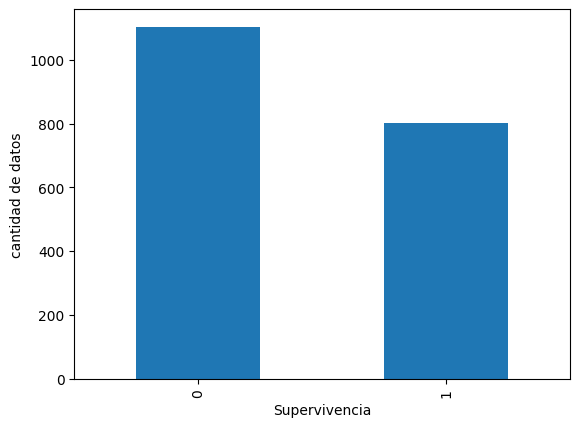

In [11]:
analisis['overall_survival'].value_counts().to_frame().T
analisis['overall_survival'].value_counts().plot(kind='bar')
plt.xlabel("Supervivencia")
plt.ylabel("cantidad de datos")

In [12]:
###modelo maquna soporte vectorial
X= df1.drop("overall_survival", axis=1).values


y = df1["overall_survival"].values
y

array([1., 1., 0., ..., 0., 0., 0.])

In [13]:
#creando datos de entrenamiento y de prueba
#Dividamos nuestros datos utilizando el 80 % para entrenamiento y el 20 % restante para pruebas.
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=20) 


In [14]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (1522, 8)


The size of our testing "X" (input features) is (381, 8)


The size of our training "y" (output feature) is (1522,)


The size of our testing "y" (output features) is (381,)


In [15]:
svc_model = SVC()

In [16]:
svc_model.fit(X_train, y_train)
svc_model

SVC()

In [17]:
#Usemos nuestro modelo entrenado para hacer una predicción usando nuestros datos de prueba
y_predict = svc_model.predict(X_test)

In [18]:
#Vamos a crear una matriz de confusión para el rendimiento de nuestro clasificador en el conjunto de datos de prueba.
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion1 = pd.DataFrame(cm, index=['vive', 'muere'],
                         columns=['vive','muere'])
confusion1


,vive,muere
vive,104,57
muere,36,184


<AxesSubplot: >

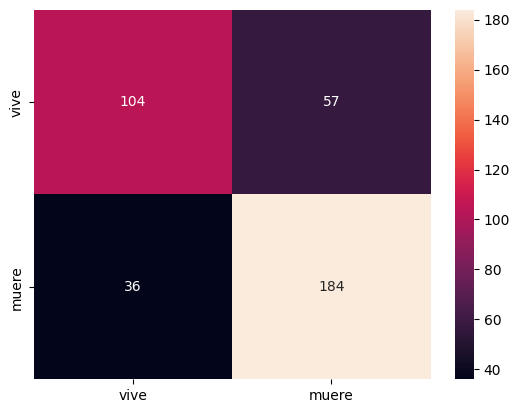

In [19]:
sns.heatmap(confusion1, annot=True,fmt="d")

In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       220
         1.0       0.74      0.65      0.69       161

    accuracy                           0.76       381
   macro avg       0.75      0.74      0.74       381
weighted avg       0.75      0.76      0.75       381



In [21]:
X_train_min = X_train.min()
X_train_min

X_train_max = X_train.max()
X_train_max


X_train_range = (X_train_max- X_train_min)
X_train_range

X_train_scaled = (X_train - X_train_min)/(X_train_range)



In [22]:
#normalizando datos de entrenamiento
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [23]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
#SVM con datos normalizados
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['muere', 'vive'],
                         columns=['muere','vive'])
confusion


,muere,vive
muere,104,57
vive,36,184


In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       220
         1.0       0.74      0.65      0.69       161

    accuracy                           0.76       381
   macro avg       0.75      0.74      0.74       381
weighted avg       0.75      0.76      0.75       381



<AxesSubplot: >

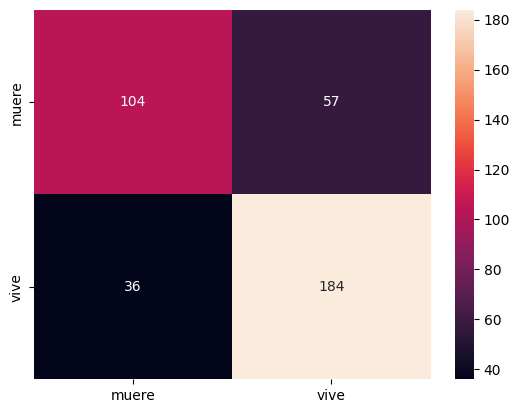

In [25]:
sns.heatmap(confusion,annot=True,fmt="d")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.698 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.685 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.582 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.582 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.580 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.705 total time=   1.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.724 total time=   0.8s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.681 total time=   0.9s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.727 total time=   0.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.715 total time=   0.2s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.715 total time=   0.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.747 total time=   0.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.766 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.715 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.698 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.740 total time=   0.1s
[CV 4/5] END ....C=1000, gam

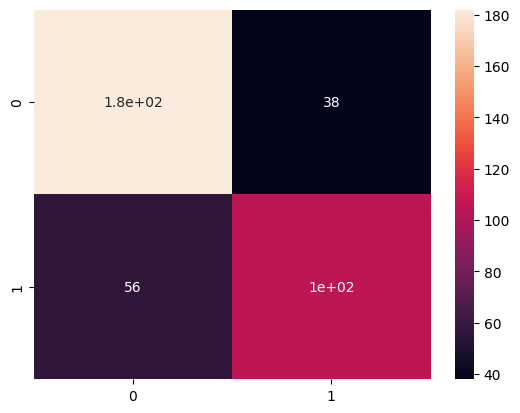

In [26]:
#hiperparametros
#find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

In [27]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [28]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [29]:
grid_predictions = grid.predict(X_test_scaled)
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
matriz0 = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
matriz0

,predicted_cancer,predicted_healthy
is_cancer,105,56
is_healthy,38,182


<AxesSubplot: >

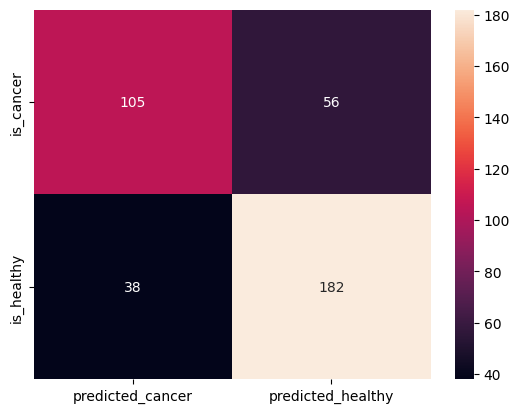

In [30]:
sns.heatmap(matriz0, annot=True, fmt="d")

In [31]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       220
         1.0       0.73      0.65      0.69       161

    accuracy                           0.75       381
   macro avg       0.75      0.74      0.74       381
weighted avg       0.75      0.75      0.75       381



In [32]:
#Regresion lineal
# paciente 1  diagnosis= 0
paciente_1 = df1.iloc[21, 2:8].values
# Visualizar las variables del paciente 1
print("datos paciente 1 : \n", paciente_1)
X = df1.iloc[:, 2:8].values
Y = df1.iloc[:, 1].values
# Importar libreria para la separaci´on de los datos de entrenamiento
from sklearn.model_selection import train_test_split
# Utilizar 25% de los Datos para Entrenar los Modelos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.25,
random_state = 0)
#Importar librer´ıa para usar el Modelo Logistic Regression
from sklearn.linear_model import LogisticRegression
#Usar el modelo Logistic Regression
logisticRegression = LogisticRegression(random_state = 0)
#Entrenar el modelo Logistic Regression
logisticRegression.fit(X_train, Y_train)
#Imprimir la respuesta del Modelo Logistic Regression
print("Logistic Regression TrainingAccuracy:",
logisticRegression.score(X_train,Y_train))

datos paciente 1 : 
 [0.09392265 0.30668168 0.         0.63474987 0.37985075 0.        ]
Logistic Regression TrainingAccuracy: 0.8724597056762439


In [33]:
pred_1 = logisticRegression.predict([paciente_1])
pred_proba_1 = logisticRegression.predict_proba([paciente_1])
print("Diagnosis: ", pred_1)
print("Probabilidad de  morir: ", pred_proba_1[0][0])
print("Probabilidad de  vivir: ", pred_proba_1[0][1])

Diagnosis:  [0.]
Probabilidad de  morir:  0.973749862324306
Probabilidad de  vivir:  0.026250137675693914


In [34]:
#Regresion lineal
# paciente 1  diagnosis= 0
paciente_1 = df1.iloc[21, 2:8].values
# Visualizar las variables del paciente 1
print("datos paciente 1 : \n", paciente_1)
X= df1.drop("overall_survival", axis=1).values
Y = df1["overall_survival"].values

# Importar libreria para la separaci´on de los datos de entrenamiento
from sklearn.model_selection import train_test_split
# Utilizar 25% de los Datos para Entrenar los Modelos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.25,
random_state = 0)
#Importar librer´ıa para usar el Modelo Logistic Regression
from sklearn.linear_model import LogisticRegression
#Usar el modelo Logistic Regression
logisticRegression = LogisticRegression(random_state = 0)
#Entrenar el modelo Logistic Regression
logisticRegression.fit(X_train, Y_train)
#Imprimir la respuesta del Modelo Logistic Regression
print("Logistic Regression TrainingAccuracy:",
logisticRegression.score(X_train,Y_train))

datos paciente 1 : 
 [0.09392265 0.30668168 0.         0.63474987 0.37985075 0.        ]
Logistic Regression TrainingAccuracy: 0.713384723195515


In [35]:


X1= df1.drop("overall_survival", axis=1).values
Y1 = df1["overall_survival"].values
X1.shape



predictions = model.predict(X1)

model.score(X1,Y1)

validation_size = 0.20
seed = 7
X1_train, X1_validation, Y1_train, Y1_validation = train_test_split(X1, Y1, test_size=validation_size, random_state=seed)
model = linear_model.LogisticRegression()
model.fit(X1_train, Y1_train)

#Usemos nuestro modelo entrenado para hacer una predicción usando nuestros datos de prueba
Y1_predict = model.predict( X1_validation)

#Vamos a crear una matriz de confusión para el rendimiento de nuestro clasificador en el conjunto de datos de prueba.
cm = np.array(confusion_matrix(Y1_validation, Y1_predict, labels=[1,0]))
matriz = pd.DataFrame(cm, index=['muere', 'vive'],
                         columns=['predicted_muere','predicted_vive'])
matriz


NameError: name 'model' is not defined

In [ ]:
sns.heatmap(matriz, annot=True, fmt="d")
print(classification_report(Y1_validation, Y_predict))

In [ ]:
#comparando independencia entre variables
plt.figure(figsize = (16,16))
sns.heatmap(analisis1.corr(), annot = True, cmap = "RdYlGn")

<h1> Pruebas de normalidad </h1>
<hr>
<h2> D'Agostino </h2>

<p> A continuación, se realiza una prueba (llamada prueba D'Agostino), para determinar si los datos siguen o no una distribución normal, ya que la prueba de Shapiro es poco precisa para la cantidad de datos que tenemos en esta base de datos. </p>

<p> Así, la prueba de hipótesis que plantea D'Agostino es la siguiente:</p>

<p> $H_0:$ Los datos proceden de una distribución normal.</p>

<p> $H_1:$ Los datos no proceden de una distribución normal.</p>

<p> Si se rechaza $H_0$, se concluye que hay evidencia estadística suficiente para afirmar que los datos no siguen una distribución normal. Por lo tanto, las siguientes celdas se centrarán en realizar esta prueba y, en caso de no seguir una distribución normal, hacer una estandarización de los datos. </p>

In [ ]:
for i in analisis1:
    k2, p_value = stats.normaltest(analisis1[i])
    print(f"{i} = {k2}, p_valor = {p_value}")

In [ ]:
# Gráfico QQ
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(df1["tumor_size"], fit = True,  line = "q", alpha = 0.05, lw = 2, ax = ax)
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Tamaño del tumor")
plt.show()

<h2> Chi cuadrado </h2>
<hr>

In [ ]:
# Chi cuadrado
from scipy.stats import chi2_contingency
  
# definiendo la tabla
data = [df1["overall_survival"], df1["tumor_size"]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpreta el p_valor
alpha = 0.05
print("El p-valor es: " + str(p))
if p <= alpha:
    print('Dependiente (rechaza H0)')
else:
    print('Independiente (H0 se mantiene verdadera)')


<h2> Estandarización de los datos </h2>

In [ ]:
from sklearn.preprocessing import StandardScaler
datos_estandarizados = StandardScaler().fit_transform(analisis1)
datos_estandarizados = pd.DataFrame(datos_estandarizados, columns = analisis1.columns)
datos_estandarizados.describe()

<h1> Modelo de regresión multilineal </h1>
<hr>

In [ ]:
# Modelo de regresión lineal
def modelo(base_datos):
    xi = [var_dep + "~"]
    for i in base_datos:
        xi[0] = xi[0] + "+" + i
    return xi[0]

MRL = smf.ols(modelo(analisis2), datos_estandarizados).fit()
MRL.summary()

In [ ]:
# Eliminando columnas cuyo P-valor supera 0.05
def limpiador_pvalor(base_datos, regresion):
    for i in base_datos:
        if regresion.pvalues[i] > 0.05:
            base_datos = base_datos.drop([i], axis = 1)
    return base_datos

y = datos_estandarizados.loc[:, var_dep]
analisis2 = datos_estandarizados.drop(var_dep, axis = 1)
analisis2 = limpiador_pvalor(analisis2, MRL)
datos_estandarizados = pd.concat([y, analisis2], axis = 1)
datos_estandarizados

In [ ]:
# Regresión con las variables contribuyentes al modelo
MRL_2 = smf.ols(modelo(analisis2), datos_estandarizados).fit()
MRL_2.summary()

<h1> Prueba ANOVA </h1>
<hr>

In [ ]:
# ANOVA
tabla_anova = sm.stats.anova_lm(MRL_2, typ = 3)
tabla_anova

In [ ]:
# variables utilizadas en el modelo de regresion 

import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for idx, feature in enumerate(list(df1.columns)[:4]):

    sns.boxplot( x='overall_survival', y=feature, data=df1, ax=axes[idx])
plt.show()